<center><h1>데이터 분석 프로젝트</h1><br></center>
<center><h3>병원 개폐업 예측 프로젝트</h3><br></center>

<div style="text-align:right">다 파악했조<br></div>
<div style="text-align:right"> 조원 강청우, 김수정, 이정승, 정지연, 정호영</div>

<h3>1. 데이터 선정</h3><br>
DACON – 데이터 분석 대회를 주최하고 서로 평가하는 대회 및 커뮤니티 사이트<br>
DACON에서 제공하는 병원 개/폐업 분류 예측 경진대회 데이터 사용<br>
기존 병원의 경영 여부를 통해 폐업하는 병원을 예측하는 모델 생성<br>

<h3>2. 데이터 설명</h3><br>
한국의 약 430개 병원의 재무제표 자료, 직원 수, 지역 정보 제공<br>
예측 결과물은 정확도로 평가<br>

<h3>3. 필요 모듈 및 라이브러리 불러오기</h3>

In [1]:
# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 넘파이 판다스 모듈
import numpy as np
import pandas as pd

# 사이킷런 데이터 전처리 모듈
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# 사이킷런 모델 클래스
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 사이킷런 모델 평가 지표
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 판다스 시각화 분석 툴
from pandas_visual_analysis import VisualAnalysis


<h3>4. 데이터 분석</h3><br>
가. 데이터 탐색<br>
나. 결측치 확인 및 처리<br>
다. 탐색적 데이터 분석 및 Feature Selection


가. 데이터 탐색<br>

In [2]:
#csv 파일 로드 및 데이터 프레임 미리보기
data = pd.read_csv('data/train.csv')
data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [3]:
print('data columns :')
print(data.columns.to_list())
print('----------------------------------------------------------------------------')
print(len(data.columns.to_list()))

data columns :
['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2', 'ownerChange']
----------------------------------------------------------------------------
58


In [4]:
# 데이터 타입 확인하기
data.dtypes

inst_id                 int64
OC                     object
sido                   object
sgg                     int64
openDate                int64
bedCount              float64
instkind               object
revenue1              float64
salescost1            float64
sga1                  float64
salary1               float64
noi1                  float64
noe1                  float64
interest1             float64
ctax1                 float64
profit1               float64
liquidAsset1          float64
quickAsset1           float64
receivableS1          float64
inventoryAsset1       float64
nonCAsset1            float64
tanAsset1             float64
OnonCAsset1           float64
receivableL1          float64
debt1                 float64
liquidLiabilities1    float64
shortLoan1            float64
NCLiabilities1        float64
longLoan1             float64
netAsset1             float64
surplus1              float64
revenue2              float64
salescost2            float64
sga2      

In [5]:
# split_num_cat(data) -> data
## data : DataFrame
# output
## data : DataFrame, 모든 칼럼의 Null값을 대체하여 채워 넣은 DataFrame
def split_num_cat(data):
    categoric_data = []
    numeric_data = []
    
    # 카테고리 변수와 수치형 변수 분리
    for col, dtype in zip(data.columns.to_list(),data.dtypes.to_list()):
        if dtype == 'float64':
            numeric_data.append(col)
        else:
            categoric_data.append(col)
    
    categoric_data = list(set(categoric_data))
    numeric_data = list(set(numeric_data))
    if 'inst_id' in categoric_data:
        categoric_data.remove('inst_id')
    if 'ownerChange' in categoric_data:
        categoric_data.remove('ownerChange')
    return numeric_data, categoric_data

In [6]:
numeric_data, categoric_data = split_num_cat(data)

In [7]:
# 간단한 통계량 확인하기
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


나. 결측치 확인 및 처리<br>

In [8]:
# Na값 , null 값 등 결측치 확인하기
print(data.isna().sum())

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [9]:
def data_cleaning(data,numeric,categoric):
    # OC칼럼에 close 앞에 공백이 있는데 이를 제거해준다.
    data['OC'] = data['OC'].str.strip()
    
    # Null값이 없는 데이터들만을 모아 병원규모 별로 평균값을 낸다.
    non_null_data = data.dropna(axis=0)
    grouped_data = non_null_data.groupby('instkind').mean()

    # Null값이 존재하는 행의 인덱스들만을 모아본다.
    na_list = []
    for col in data.columns:
        for idx in list(data[data[col].isna()].index):
            na_list.append(idx)
    
    # 집합을 이용하여 중복제거
    isNullList = sorted(list(set(na_list)))

    # 데이터를 한 행씩 읽어 나가면서 null값이나 누락값을 가진 속성이 존재하면 같은 동급 병원규모에 해당하는 데이터들의 평균값으로 채워 넣는다.
    for idx,item in data.iloc[isNullList,:].iterrows():
        for col in grouped_data.columns:
            if str(item[col]) in ['nan', '0','0.0'] and idx!=193:
                data.loc[idx,col] = grouped_data.loc[data.loc[idx,:].instkind,col]

    # 193번 데이터는 병원 종류와 병상수 모두 Null값으로 존재한다. 삭제를 선택
    data.drop(193,inplace=True)
    data.reset_index(inplace=True,drop=True)

    # NaN 값을 제외한 ownerChange 칼럼의 값을 0,1로 인코딩한다.
    data['ownerChange'] = np.where(data['ownerChange']=='change',1,np.where(data['ownerChange']=='same',0,np.NaN))
    for col in categoric_data:
            data[col] = data[col].astype('category').cat.codes
            data[col] = data[col].astype('int')

    # KNN알고리즘을 이용해 ownerChange 칼럼이 NaN값인 데이터의 값을 가장 유사한 데이터의 값으로 채워 넣는다.
    imputer = KNNImputer(n_neighbors=1)
    tmp = pd.DataFrame(imputer.fit_transform(data))

    # 칼럼명을 다시 설정
    tmp.columns = data.columns
    data = tmp

    return data

In [10]:
data = data_cleaning(data,*split_num_cat(data))

다. 데이터 탐색 및 Feature Selection<br>

데이터를 탐색하고 데이터의 특성을 파악한다.
파생변수를 생성하고 그 후 학습에 사용할 중요한 속성을 선택한다.<br>

사용할 방식<br>
재무재표 분석 : 속성 중 비용과 법인세등 서로 종속적인 속성이 많이 존재한다. 이를 통해 종속적인 속성을 drop함으로 써 불필요한 속성을 줄여나간다.<br>
상관관계 분석 : 상관계수를 구하고 상관계수의 절댓값이 높은 칼럼 조합을 통해서 변수를 조금 더 단순하게 바꿔본다.<br>
주성분 분석(PCA) : 다중 속성을 좀 더 작은 차원의 주성분으로 새로운 데이터를 만들어내는 것이다.<br>


In [11]:
# 속성 중 비용과 법인세등 서로 종속적인 속성이 많이 존재한다. 이를 통해 종속적인 속성을 drop함으로 써 불필요한 속성을 줄여나간다.
# 똑같은 칼럼이 2017년 2016년 이 서로 같은 이름에 1,2로 달리 존재하므로 이를 통해 칼럼을 줄인다.
derived  = ['revenue', 'salescost', 'sga', 'salary', 'noi', 'noe', 'interest', 'ctax', 'profit', 'liquidAsset', 'quickAsset', 'receivableS', 'inventoryAsset', 
'nonCAsset', 'tanAsset','OnonCAsset', 'receivableL', 'debt', 'liquidLiabilities','shortLoan', 'NCLiabilities', 'longLoan', 'netAsset', 'surplus','employee']

In [12]:
# select_cols(data,cols) -> DataFrame
# inputs
## data : 데이터프레임
## cols : 선택할 속성명
# output
## DataFrame
def select_cols(data,cols):
    return data.loc[:,cols]

# make_derivate(data,cols) -> derivated
# inputs
## data : 데이터프레임 (Null 값이 없는 정제된 값)
## cols : 속성명 2017년도 - 206년도 할 속성명
# output
## derivated : 유도된 속성들과 기존 필수 칼럼들을 가지고 있는 데이터 프레임
def make_derivate(data,cols):
    derivated = pd.DataFrame()
    necessary = ['sido','instkind']
    pre_data = pd.get_dummies(data[['sido','instkind']].astype('str'))
    for col in cols:
        derivated[col+'_diff'] = data[col+'1'] - data[col+'2']
    derivated['OC'] = data['OC']
    return pd.concat([pre_data,derivated],axis=1)


In [13]:
# cols : 실제로 다른 칼럼들을 포함하는 변수들 중 대표가되는 칼럼들을 선택
cols = ['revenue','noi','salescost','sga','noe','ctax','liquidLiabilities','NCLiabilities','liquidAsset','nonCAsset']
data = make_derivate(data,cols)
data

,sido_0.0,sido_1.0,sido_10.0,sido_11.0,sido_12.0,sido_13.0,sido_14.0,sido_15.0,sido_2.0,sido_3.0,...,noi_diff,salescost_diff,sga_diff,noe_diff,ctax_diff,liquidLiabilities_diff,NCLiabilities_diff,liquidAsset_diff,nonCAsset_diff,OC
0,0,0,0,0,0,0,0,0,1,0,...,-5.422340e+05,0.000000e+00,-9.628707e+07,-1.474712e+07,1.283372e+07,-2.155316e+07,-5.461460e+07,1.825302e+08,-3.352830e+07,1.0
1,0,0,0,0,0,0,0,0,0,0,...,1.238722e+08,1.933420e+08,3.466290e+09,-1.315082e+08,2.127925e+07,8.240150e+08,1.949935e+09,5.150572e+08,2.491472e+09,1.0
2,0,0,0,0,0,0,0,0,0,0,...,7.615600e+04,5.154837e+08,4.472197e+08,3.000000e+04,0.000000e+00,9.241434e+07,0.000000e+00,2.724421e+08,1.204810e+08,1.0
3,0,0,1,0,0,0,0,0,0,0,...,2.941526e+07,0.000000e+00,5.753205e+09,-9.410484e+07,-4.512194e+07,1.097328e+10,-6.364497e+09,1.915823e+09,3.595795e+09,1.0
4,0,0,0,0,0,0,0,0,0,0,...,-4.853959e+08,0.000000e+00,5.302526e+08,-1.030186e+08,0.000000e+00,-1.163398e+09,-3.710896e+08,1.410308e+09,-2.864045e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,1,0,0,0,0,0,...,-4.821919e+07,9.562002e+06,-8.520281e+08,5.349343e+08,-5.160864e+07,-1.098198e+09,3.897958e+08,2.260411e+08,-3.400561e+08,1.0
296,0,0,0,0,0,0,0,0,1,0,...,-2.386063e+08,6.672417e+09,1.274022e+09,-5.950085e+08,2.866089e+07,3.358350e+08,-4.113762e+08,3.183131e+08,9.233064e+08,0.0
297,0,0,0,0,0,0,0,0,0,0,...,-5.218987e+07,-1.293421e+09,-2.981850e+08,4.916528e+06,2.866089e+07,-1.206310e+08,0.000000e+00,-2.073841e+08,1.500000e+07,0.0
298,0,0,0,0,0,0,0,0,0,0,...,1.131200e+08,-2.180236e+08,-1.464406e+09,-1.063551e+09,6.461230e+06,1.107060e+09,8.339939e+06,-9.666775e+08,-1.008900e+07,0.0


In [14]:
VisualAnalysis(data,
    layout=[["Scatter", "Scatter"],
            ["BoxPlot", 'Histogram']],
               row_height=[250, 500]   # 인터페이스 전체 넓이 및 높이 지정
)

In [15]:
# clip_outlier(inst_num_data) -> result <이상치가 clip된 데이터프레임>
# input
## inst_num_data : DataFrame
# output
## result :  Clipped DataFrame
def clip_outlier(inst_num_data,min_max = 'default'):
    # min_max {'default': 'min_ = first_IQR, max_ = third_IQR',
    #          'min_max': 'min_ = inst_num_data[col].min(), max_ = inst_num_data[col].max()' }
    #over = []
    r_inst_num_data = pd.DataFrame() # 이상치 변경 데이터프레임 생성할 것
    numeric = []
    non_numeric = []
    for col in inst_num_data.columns:
        if 'diff' in col:
            numeric.append(col)
        else:
            non_numeric.append(col)
    non_numeric_data = inst_num_data[non_numeric]

    for col in numeric:
        # IQR 이용 : IQR= [제 3사분위수] - [제 1사분위수]
        first = np.percentile(inst_num_data[col], 25, interpolation='nearest') # 제 1사분위수
        third = np.percentile(inst_num_data[col], 75, interpolation='nearest') # 제 3사분위수
        IQR = third - first
        
        # 제 1사분위수보다 1.5IQR이상 작거나 제 3사분위수보다 1.5IQR이상 큰 값들을 이상치로 구분
        first_IQR = first-IQR*1.5
        third_IQR = third+IQR*1.5

        min_ = first_IQR
        max_ = third_IQR
        
        if min_max == 'min_max':
            min_ = inst_num_data[col].min()
            max_ = inst_num_data[col].max()


        # 이상치 인덱스 및 값을 저장
        up_idx = (inst_num_data[inst_num_data[col] > third_IQR].index)
        down_idx = (inst_num_data[inst_num_data[col] < first_IQR].index)
        up_val = list(inst_num_data.loc[up_idx,col])
        down_val = list(inst_num_data.loc[down_idx,col])

        # 이상치 개수
        up_over = inst_num_data[inst_num_data[col] > third_IQR].shape[0]
        down_over = inst_num_data[inst_num_data[col] < first_IQR].shape[0]
        
        # np.clip 이상치를 주변 대푯값(min,max)으로 바꾸기
        # min과 max 값을 바꾸어 
        num_array = inst_num_data[col].array
        r_inst_num_data[col] = np.clip(num_array, min_, max_) # numpy.clip(array, min, max)

    result = pd.DataFrame(np.c_[np.array(non_numeric_data),np.array(r_inst_num_data)])
    result.columns = non_numeric + numeric
    return result

In [16]:
data = clip_outlier(data,min_max='min_max')
data.head(30)

,sido_0.0,sido_1.0,sido_10.0,sido_11.0,sido_12.0,sido_13.0,sido_14.0,sido_15.0,sido_2.0,sido_3.0,...,revenue_diff,noi_diff,salescost_diff,sga_diff,noe_diff,ctax_diff,liquidLiabilities_diff,NCLiabilities_diff,liquidAsset_diff,nonCAsset_diff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-8.031824e+07,-5.422340e+05,0.000000e+00,-9.628707e+07,-1.474712e+07,1.283372e+07,-2.155316e+07,-5.461460e+07,1.825302e+08,-3.352830e+07
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.264545e+09,1.238722e+08,1.933420e+08,3.466290e+09,-1.315082e+08,2.127925e+07,8.240150e+08,1.949935e+09,5.150572e+08,2.491472e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004522e+09,7.615600e+04,5.154837e+08,4.472197e+08,3.000000e+04,0.000000e+00,9.241434e+07,0.000000e+00,2.724421e+08,1.204810e+08
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.649006e+09,2.941526e+07,0.000000e+00,5.753205e+09,-9.410484e+07,-4.512194e+07,1.097328e+10,-6.364497e+09,1.915823e+09,3.595795e+09
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.607370e+08,-4.853959e+08,0.000000e+00,5.302526e+08,-1.030186e+08,0.000000e+00,-1.163398e+09,-3.710896e+08,1.410308e+09,-2.864045e+09
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.539098e+08,-6.026683e+07,-6.161420e+08,-3.683077e+08,2.911864e+08,0.000000e+00,-3.361751e+09,-2.000000e+07,7.656857e+08,-3.477443e+09
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.117334e+09,8.306136e+07,-3.148806e+08,1.260974e+09,-5.064204e+07,-7.693937e+07,7.056978e+09,-2.576700e+09,3.610923e+08,-3.516812e+08
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.862735e+09,-3.695702e+08,1.175437e+09,1.437995e+09,2.245827e+09,3.125135e+08,1.434358e+10,-3.442379e+09,4.074534e+09,-2.928085e+09
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-7.620741e+07,1.956999e+08,-2.112083e+07,6.631265e+07,-2.492024e+08,9.989394e+07,-1.554118e+09,-2.078189e+07,1.017168e+09,-1.557324e+09
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-4.575352e+09,4.661253e+08,-7.641224e+08,-4.288000e+08,-1.754577e+09,-9.153942e+07,-3.021292e+09,-1.351110e+09,4.977253e+08,-5.388727e+09


In [17]:
# Sclaer(data, method = 'mm') -> scaled_data<DataFrame>:
# input
## data : 데이터프레임
## method : 사용할 스케일러 약자 mm >> MinMax , std >> Standard
# output
## scaled_data : numeric 칼럼을 스케일링 한 데이터 프레임
def Scaler(data, method = 'mm'):
    numeric = []
    non_numeric = []
    for col in data.columns:
        if 'diff' in col:
            numeric.append(col)
        else:
            non_numeric.append(col)
    
    # method 입력값에 따라 스케일러 종류가 달라짐
    method_dict1 = {'mm': MinMaxScaler(),
                    'std': StandardScaler()}
    scaler = method_dict1[method]

    #카테고리데이터는 따로 받아두고
    non_scaled_data = np.array(data[non_numeric])

    # numeric 칼럼은 스케일링후
    scaled_data = scaler.fit_transform(data[numeric])

    # 두 어레이를 합친후 데이터프레임으로
    scaled_data = pd.DataFrame(np.c_[scaled_data,non_scaled_data])
    # 칼럼명을 설정
    scaled_data.columns = numeric + non_numeric

    return scaled_data


In [18]:
data = Scaler(data)
data

,revenue_diff,noi_diff,salescost_diff,sga_diff,noe_diff,ctax_diff,liquidLiabilities_diff,NCLiabilities_diff,liquidAsset_diff,nonCAsset_diff,...,sido_8.0,sido_9.0,instkind_0.0,instkind_1.0,instkind_2.0,instkind_3.0,instkind_4.0,instkind_5.0,instkind_6.0,OC
0,0.513842,0.153100,0.097874,0.453857,0.561128,0.482750,0.659936,0.575906,0.517749,0.180349,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.557410,0.164839,0.112504,0.505276,0.552725,0.487610,0.678201,0.602277,0.534698,0.237511,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.527972,0.153158,0.136881,0.461702,0.562192,0.475365,0.662398,0.576625,0.522332,0.183836,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.588468,0.155927,0.097874,0.538284,0.555417,0.449400,0.897430,0.492896,0.606094,0.262512,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.527402,0.107350,0.097874,0.462900,0.554776,0.475365,0.635272,0.571743,0.580328,0.116270,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.521998,0.148601,0.098598,0.442949,0.600688,0.445667,0.636680,0.581753,0.519967,0.173410,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,0.436399,0.130636,0.602781,0.473635,0.519368,0.491858,0.667656,0.571213,0.524670,0.202010,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297,0.654915,0.148226,0.000000,0.450943,0.562544,0.491858,0.657796,0.576625,0.497876,0.181448,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
298,0.489098,0.163825,0.081376,0.434111,0.485648,0.479083,0.684315,0.576735,0.459175,0.180880,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


칼럼간의 상관 분석<br>
구한 데이터의 상관관계 분석을 하고 자기 자신과의 계수를 제외한 계수중 0.5 이상인 칼럼조합을 구한다.

In [19]:
# correlation_analysis(data) -> (high_corr, new_list) <corr_map,high_corr_list>:
# input
## data : DataFrame
# output
## high_corr : 상관계수 매트릭스
## new_list : 0.5 이상의 높은 상관관계를 가지는 칼럼 조합
def correlation_analysis(data):

    corr = data.corr()
    high_corr = corr[np.abs(corr) > 0.5 ].style.background_gradient(cmap='coolwarm')

    corelation_list = []
    for i in corr.index:
        for j in corr.columns:
            if np.abs(corr.loc[i,j]) > 0.5 and i!=j :
                print(i,j)
                corelation_list.append((i,j))

    new_list = []
    for comb in corelation_list:
        comb = list(comb)
        comb = sorted(comb)
        if comb in new_list:
            pass
        else:
            new_list.append(comb)
    new_list
    
    return high_corr, new_list

In [20]:
corr_map, corr_col_list = correlation_analysis(data)

revenue_diff sga_diff
noi_diff noe_diff
sga_diff revenue_diff
noe_diff noi_diff
instkind_3.0 instkind_4.0
instkind_4.0 instkind_3.0


In [21]:
corr_map

,revenue_diff,noi_diff,salescost_diff,sga_diff,noe_diff,ctax_diff,liquidLiabilities_diff,NCLiabilities_diff,liquidAsset_diff,nonCAsset_diff,sido_0.0,sido_1.0,sido_10.0,sido_11.0,sido_12.0,sido_13.0,sido_14.0,sido_15.0,sido_2.0,sido_3.0,sido_4.0,sido_5.0,sido_6.0,sido_7.0,sido_8.0,sido_9.0,instkind_0.0,instkind_1.0,instkind_2.0,instkind_3.0,instkind_4.0,instkind_5.0,instkind_6.0,OC
revenue_diff,1.000000,nan,nan,0.922011,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
noi_diff,nan,1.000000,nan,nan,0.518635,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
salescost_diff,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sga_diff,0.922011,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
noe_diff,nan,0.518635,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ctax_diff,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
liquidLiabilities_diff,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NCLiabilities_diff,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
liquidAsset_diff,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nonCAsset_diff,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
VisualAnalysis(data,
    layout=[["Scatter", "Scatter"],
            ["BoxPlot", 'Histogram']],
               row_height=[500, 500]   # 인터페이스 전체 넓이 및 높이 지정

)

In [23]:
def preporcessing(data):

    data = data_cleaning(data,*split_num_cat(data))

    cols = ['revenue','noi','salescost','sga','noe','ctax','liquidLiabilities','NCLiabilities','liquidAsset','nonCAsset']
    data = make_derivate(data,cols)

    data = clip_outlier(data,min_max='min_max')

    data = Scaler(data)
    corr_map, corr_col_list = correlation_analysis(data)
    return data, corr_map, corr_col_list


In [24]:
import xgboost as xgb

from pj2_jiyeon import load_data,train_test, EncodingTrain, prediction, main_func

     instkind  ownerChange  NCLiabilities      debt  liquidAsset  \
0         5.0          2.0      -0.040229 -0.179427    -0.094481   
1         3.0          2.0      -0.042370 -0.345823     0.168683   
2         5.0          2.0      -0.025673 -0.136004    -0.033737   
3         3.0          2.0      -1.721866  1.027320     1.076523   
4         3.0          2.0      -0.124572 -0.555060     0.734999   
..        ...          ...            ...       ...          ...   
296       5.0          2.0       0.078210 -0.342277    -0.065085   
297       4.0          2.0      -0.025673 -0.159808    -0.217797   
298       4.0          0.0      -0.025673 -0.190880    -0.357905   
299       5.0          0.0      -0.025673 -0.174955    -0.870880   
300       7.0          2.0      -0.024341 -0.141894    -0.106016   

     liquidLiabilities  longLoan  netAsset  nonCAsset  quickAsset   revenue  \
0            -0.176396  0.015782 -0.103299  -0.251918   -0.092614 -0.372349   
1            -0.388200  0

# vote

In [25]:

train_data = load_data('data/train.csv')
data,_,_ = preporcessing(train_data)
X, y = data.drop('OC',axis=1), data['OC']
models = train_test(X,y)

#test_data = load_data('data/test.csv')
#data,_,_ = preporcessing(test_data)
#prediction(models, Xtest)

svc_model = models[0]
dtc_model = models[1]
rtc_model = models[2]
xgb_model1 = models[3]
ada_model = models[4]
gbc_model = models[5]
rid_model = models[6]
xgb_model2 = models[7]


revenue_diff sga_diff
noi_diff noe_diff
sga_diff revenue_diff
noe_diff noi_diff
instkind_3.0 instkind_4.0
instkind_4.0 instkind_3.0
svc_model score :  0.9166666666666666
dtc_model score :  0.85
rtc_model score :  0.9166666666666666
xgb_model1 score :  0.9166666666666666
xgb_model2 score :  0.9166666666666666
ada_model score :  0.9166666666666666
gbc_model score :  0.9
rid_model score :  0.9166666666666666


In [26]:
hard_voting_result = svc_model.predict(X)+dtc_model.predict(X)+rtc_model.predict(X)+xgb_model1.predict(X)
hard_acc = sum(np.where(hard_voting_result > 2,1, 0) == y)/hard_voting_result.size
hard_acc

0.9766666666666667

In [27]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

In [28]:
hard_voting_result = svc_model.predict(X)+dtc_model.predict(X)+rtc_model.predict(X)+xgb_model1.predict(X)+ada_model.predict(X)+gbc_model.predict(X)+rid_model.predict(X)
hard_acc = sum(np.where(hard_voting_result > 2,1, 0) == y)/hard_voting_result.size
hard_acc

0.9633333333333334

In [29]:
len(hard_voting_result)

300

In [30]:
# 학습, 테스트 분리
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)


In [31]:
svc_result = svc_model.predict_proba(Xtest) #[:,]
dtc_result = dtc_model.predict_proba(Xtest)
rtc_result = rtc_model.predict_proba(Xtest)
xgb_result = xgb_model1.predict_proba(Xtest)
ada_result = ada_model.predict_proba(Xtest)
gbc_result = gbc_model.predict_proba(Xtest)
# rid_result = rid_model.predict_proba(Xtest)
soft_voting_result = svc_result+ dtc_result+ rtc_result+xgb_result+ ada_result+ gbc_result #, rid_model
soft_voting_result
soft_acc = sum(np.array(soft_voting_result[:,0] < soft_voting_result[:,1], dtype='int') == ytest)/ytest.size

In [32]:
soft_acc

0.95

In [33]:
print("svc_model :",svc_model.score(Xtest,ytest))
print("dtc_model :",dtc_model.score(Xtest,ytest))
print("rtc_model :",rtc_model.score(Xtest,ytest))
print("xgb_model1 :",xgb_model1.score(Xtest,ytest))
print("ada_model :",ada_model.score(Xtest,ytest))
print("gbc_model :",gbc_model.score(Xtest,ytest))
print("rid_model :",rid_model.score(Xtest,ytest))
print("hard_voting_model : ", hard_acc)
print("soft_voting_model : ", soft_acc)

svc_model : 0.95
dtc_model : 0.9333333333333333
rtc_model : 0.95
xgb_model1 : 0.95
ada_model : 0.9666666666666667
gbc_model : 0.9333333333333333
rid_model : 0.95
hard_voting_model :  0.9633333333333334
soft_voting_model :  0.95


### confusion_matrix

In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [35]:
confusion_matrix(ytest, svc_model.predict(Xtest))

array([[ 0,  3],
       [ 0, 57]], dtype=int64)

In [36]:
models_ = [svc_model, dtc_model, rtc_model, xgb_model1, ada_model, gbc_model, rid_model]
for i in range(7):
    cm = confusion_matrix(ytest, models_[i].predict(Xtest))
    print(cm)
    print("--------")
    

[[ 0  3]
 [ 0 57]]
--------
[[ 1  2]
 [ 2 55]]
--------
[[ 0  3]
 [ 0 57]]
--------
[[ 0  3]
 [ 0 57]]
--------
[[ 1  2]
 [ 0 57]]
--------
[[ 0  3]
 [ 1 56]]
--------
[[ 0  3]
 [ 0 57]]
--------


### confusion_matrix 시각화

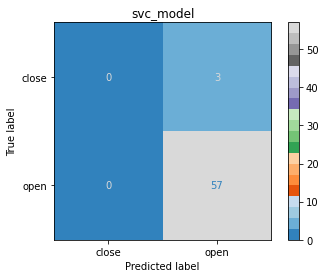

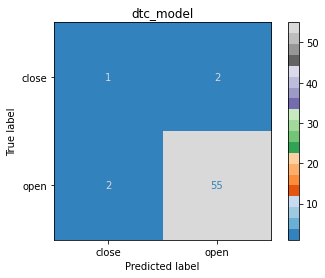

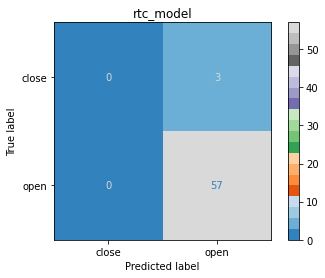

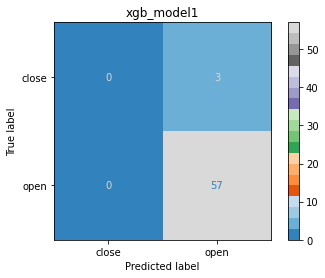

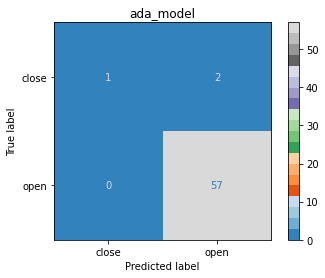

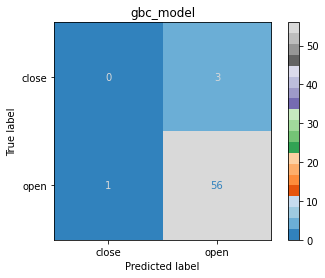

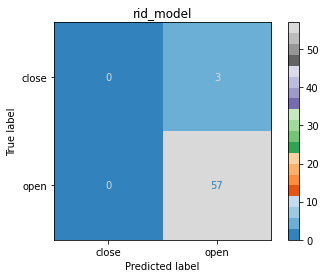

In [37]:
models_nm = ['svc_model', 'dtc_model', 'rtc_model', 'xgb_model1', 'ada_model', 'gbc_model', 'rid_model']
label = ['close','open']

#fig=plt.figure(figsize=(20,10))

for i in range(7):
#    subplot=fig.add_subplot(2,4,i+1)
    plot = plot_confusion_matrix(models[i],Xtest,ytest,display_labels=label,cmap='tab20c',normalize=None)
    plot.ax_.set_title(models_nm[i])
#    img = Image.fromarray(np.uint8(plot.im_.get_cmap()(plot.im_.get_array())*255))
#    subplot.imshow(img)
#    subplot.set_title(models_nm[i])
#    subplot.set_xticklabels(label)
#    subplot.set_yticklabels(label)

<h3>코드 검증내용(모델 검증)</h3><br>
1. Pre-Processing for Data Cleaning<br>
2. Feature Engineering and Variable Selection<br>
3. Model Selection and Regularization<br>
4. Optimization Processing<br>


In [49]:

inputs = keras.Input(shape=(784,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  
   
  model = keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(33,)),
    layers.Dense(32, activation='elu'),
    layers.Dropout(rate=0.2),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
  ])
    
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [51]:
checkpoint_filepath = 'data/model/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

dnn_model = build_model()

In [56]:

train_data = load_data('data/train.csv')
data,_,_ = preporcessing(train_data)
X, y = data.drop('OC',axis=1), data['OC']
models = train_test(X,y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)


history = dnn_model.fit(Xtrain,ytrain,epochs=400,batch_size=64, callbacks=[model_checkpoint_callback])


revenue_diff sga_diff
noi_diff noe_diff
sga_diff revenue_diff
noe_diff noi_diff
instkind_3.0 instkind_4.0
instkind_4.0 instkind_3.0
svc_model score :  0.9166666666666666
dtc_model score :  0.85
rtc_model score :  0.9166666666666666
xgb_model1 score :  0.9166666666666666
xgb_model2 score :  0.9166666666666666
ada_model score :  0.9166666666666666
gbc_model score :  0.9
rid_model score :  0.9166666666666666
Epoch 1/400
4/4 [==============================] - 0s 1ms/step - loss: 1.1375e-07 - accuracy: 0.1458
Epoch 2/400
4/4 [==============================] - 0s 997us/step - loss: 1.1375e-07 - accuracy: 0.1750
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 1.1375e-07 - accuracy: 0.1500
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 1.1375e-07 - accuracy: 0.1208
Epoch 5/400
4/4 [==============================] - 0s 1ms/step - loss: 1.1375e-07 - accuracy: 0.1333
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 1.1375e-07 - 